# Taller de Análisis de Texto con Tweets en Español

Este taller guía a los estudiantes en el análisis de tweets en español, usando técnicas de limpieza de texto, análisis de frecuencia de palabras y análisis de sentimientos. También incluye preguntas orientadas al negocio.

In [23]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv

--2025-11-13 01:42:46--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv [following]
--2025-11-13 01:42:47--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205292 (200K) [text/plain]
Saving to: ‘Gender_bias_spanish.csv.1’

Gender_bias

## 1. Configuración e Importación de Librerías
Primero, importaremos las librerías necesarias y cargaremos el conjunto de datos.

In [24]:
import pandas as pd
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
import string # Added this import
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Cargar el Conjunto de Datos
Cargamos el archivo CSV que contiene los tweets y las etiquetas ('biased' o 'non-biased').

In [25]:
data = pd.read_csv('Gender_bias_spanish.csv')

In [26]:
data

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased
...,...,...
1909,"iba a ir a dash pero mis 3 cortadas, mi color ...",non-biased
1910,que pinche chiste tiene estar medio alto si to...,non-biased
1911,si fuera bien idiota. ya hubiera comprado un a...,non-biased
1912,nota mental: no le quieras ayudar a alguien qu...,non-biased


## 2. Exploración de Datos
Exploraremos el conjunto de datos para entender mejor la distribución de etiquetas y las características de los tweets.

In [6]:
data.head()

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased


In [7]:
data["Label"].value_counts(normalize=True)

,proportion
Label,
non-biased,0.833856
biased,0.166144


**Pregunta:** ¿Qué proporción de tweets son 'biased' y 'non-biased'? ¿Por qué podría ser importante esta proporción para el análisis de texto?

La cantidad de los tweets non biased es mayor a la de los baised, podría decirse que la primera categoría sextuplica a la segunda. Definir esa segmentación es necesaria e importante para delimitar en cuáles se puede acusar un sesgo y en cuales no y así hacer un análisis más objetivo desde los datos

## 3. Preprocesamiento de Texto
Realizamos una serie de pasos para limpiar y preparar el texto para el análisis: limpieza de caracteres especiales, conversión a minúsculas, y eliminación de stopwords.

In [8]:
import re
import string

def limpiar_texto(texto):
    texto = str(texto).lower()
    texto = re.sub(r'http\S+|www\S+|https\S+', '', texto, flags=re.MULTILINE)
    texto = re.sub(r'@\w+', '', texto)
    texto = re.sub(r'#', '', texto)
    texto = re.sub(r'\d+', '', texto)
    texto = texto.translate(str.maketrans('', '', string.punctuation))
    texto = re.sub(r'\s+', ' ', texto).strip()
    return texto

In [9]:
data['Contents_limpio'] = data['Contents'].apply(limpiar_texto)

In [10]:
data[['Contents', 'Contents_limpio']].head()

,Contents,Contents_limpio
0,@chumeltorres ya cabrón! sin tí se reciben las...,ya cabrón sin tí se reciben las noticias sin c...
1,¿alguien es tan amable de ir a hacerme la comp...,¿alguien es tan amable de ir a hacerme la comp...
2,"@jenniferduquee hahaha, si está rico, nadamas ...",hahaha si está rico nadamas le falta presentación
3,@evagelcot donde lo ves!!? es mi programa favo...,donde lo ves es mi programa favorito y sólo en...
4,como siempre mi tortilla triunfa mas que otros...,como siempre mi tortilla triunfa mas que otros...


## 4. Análisis de Frecuencia de Palabras por Etiqueta
Contamos las palabras en tweets 'biased' y 'non-biased' y visualizamos las palabras más comunes.

In [11]:
biased_texts = data[data['Label'] == 'biased']['Contents_limpio']
non_biased_texts = data[data['Label'] == 'non-biased']['Contents_limpio']

# Contar palabras

biased_words = ' '.join(biased_texts).split()
non_biased_words = ' '.join(non_biased_texts).split()


biased_freq = Counter(biased_words)
non_biased_freq = Counter(non_biased_words)


In [12]:
# Visualización de frecuencia de palabras
print("Palabras más comunes en tweets 'biased':")
print(biased_freq.most_common(10))

Palabras más comunes en tweets 'biased':
[('que', 172), ('no', 137), ('de', 136), ('a', 121), ('y', 116), ('la', 95), ('me', 90), ('es', 76), ('en', 68), ('las', 56)]


In [13]:
print("\nPalabras más comunes en tweets 'non-biased':")
print(non_biased_freq.most_common(10))


Palabras más comunes en tweets 'non-biased':
[('de', 946), ('que', 916), ('y', 710), ('no', 595), ('a', 559), ('la', 556), ('me', 467), ('el', 442), ('en', 438), ('es', 368)]


In [14]:
import matplotlib.pyplot as plt
biased_df = pd.DataFrame(biased_freq.most_common(10), columns=['Palabra', 'Frecuencia'])
non_biased_df = pd.DataFrame(non_biased_freq.most_common(10), columns=['Palabra', 'Frecuencia'])

Text(0, 0.5, 'Frecuencia')

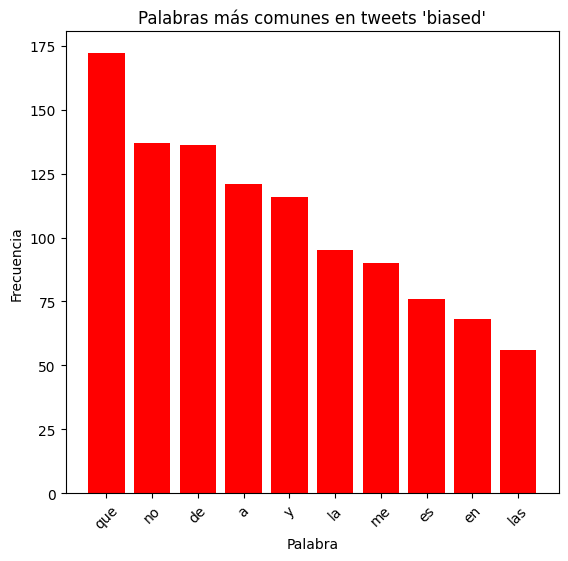

In [15]:
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.bar(biased_df['Palabra'], biased_df['Frecuencia'], color='red')
plt.title("Palabras más comunes en tweets 'biased'")
plt.xticks(rotation=45)
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')

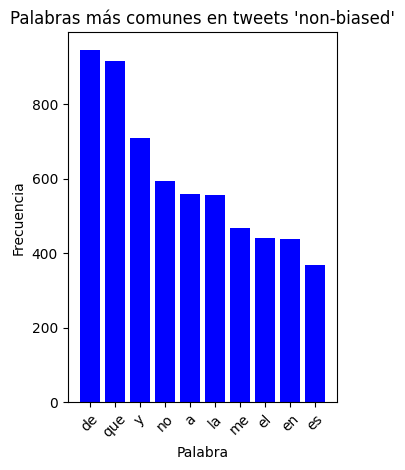

In [16]:
plt.subplot(1, 2, 2)
plt.bar(non_biased_df['Palabra'], non_biased_df['Frecuencia'], color='blue')
plt.title("Palabras más comunes en tweets 'non-biased'")
plt.xticks(rotation=45)
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

**Preguntas de Análisis de Frecuencia:**
- ¿Qué palabras son más comunes en los tweets 'biased' en comparación con los 'non-biased'?
- ¿Hay palabras que sugieran un sesgo en los tweets etiquetados como 'biased'?
- ¿Cómo podrían usar las empresas esta información para entender mejor las opiniones sesgadas?

En los tweets NO sesgados, la palabra que más se repite es de, la cual es una preposición que puede servir de conector y que pueden estar en cualquier frase que se pronuncia diariamente. En comparación con los tweets sesgados, la palabra más comun es un que el cuál es un medidor de que siempre se buscan aclaraciones, la palabra no está dirrectamente relacionada con la negación que tiene la mayoría de comentariops sesgados que se esuchan al día


La palabra 'me' es un claro indicador de que las personas que emiten tweets sesgados se basan en su opinion y no en hechos demostrables, eso sugiere que sus argumentos están basados en su propia experiencia

A partir de esto se puede analizar detalladamente las formas de argumentación y como las personas basan su entendiemiento en situaciones personales, además de estar aclarando la opinion con palabras como 'que'

## 6. Visualización con Nube de Palabras
Usamos una nube de palabras para visualizar las palabras más comunes en cada conjunto de tweets.

In [17]:
## Cree una funcion para geenrar nube de palabras
def generar_nube_palabras(texto):
    palabras = (limpiar_texto(texto))
    nube = WordCloud(width=800, height=400, background_color='white').generate(palabras)
    plt.figure(figsize=(10, 5))
    plt.imshow(nube, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [18]:
non_biased=data[data['Label'] == 'non-biased']
texto =' '.join(non_biased['Contents'])

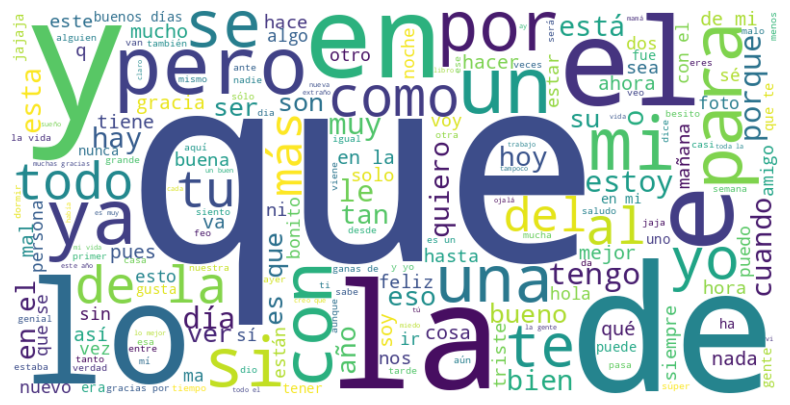

In [19]:
generar_nube_palabras(texto)

In [20]:
biased=data[data['Label'] == 'biased']
texto=' '.join(biased['Contents'])

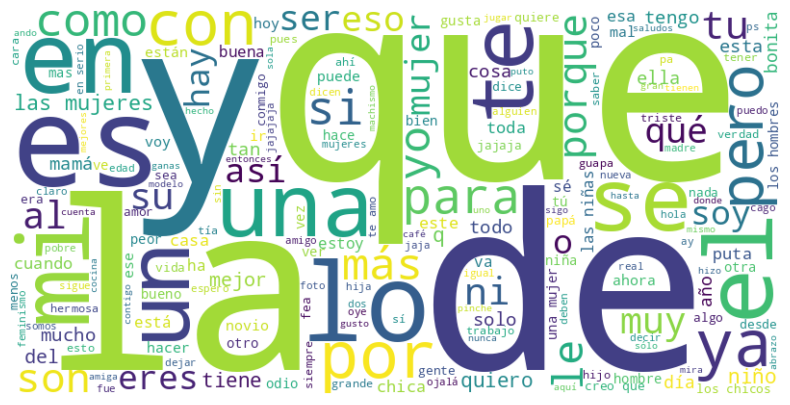

In [22]:
generar_nube_palabras(texto)

## 7. Conclusiones y Perspectiva de Negocios
En este taller, hemos explorado cómo el análisis de texto puede ofrecer información valiosa sobre el contenido y el sentimiento de los tweets. Reflexionemos sobre algunas preguntas de negocio:
- ¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?
- ¿Qué ajustes se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased'?
- ¿Qué patrones importantes se podrían explorar en un análisis futuro (e.g., análisis de tendencias a lo largo del tiempo)?

La comunicación de una marca se puede delimitar por las palabras más usadas y así, la intención se puede identificar de acuerdo al tono que puede brindar la combinación de las mismas

Una campaña de marketing tiene que enfocar sus esfuerzos en que los tweets mejoren en su capacidad de escritura y correlación entre ideas, lo cual demuestre sensatez en cada palabra y que se pueda avanzar hacia un mundo digital menos sesgado, más crítico y responsable en sus palabras

A partir del análisis de tendencias se puede establacer un patrón claro en la forma de expresar una opinión. Las preposiciones que pueden mostrar una intención son las claves para entender como piensa el usuario y cuál es su forma de valorar o calificar cierta situación